## content 리셋

In [ ]:
import os
import shutil

# 'content' 디렉토리 경로
content_dir = '/content/'

# 디렉토리 내의 모든 파일과 디렉토리 삭제
for filename in os.listdir(content_dir):
    filepath = os.path.join(content_dir, filename)
    try:
        if os.path.isfile(filepath) or os.path.islink(filepath):
            os.unlink(filepath)
        elif os.path.isdir(filepath):
            shutil.rmtree(filepath)
    except Exception as e:
        print(f"Failed to delete {filepath}. Reason: {e}")

print("content 디렉토리 내의 모든 파일이 삭제되었습니다.")

content 디렉토리 내의 모든 파일이 삭제되었습니다.


## CSV 불러오기

In [ ]:
import pandas as pd
import numpy as np

actual_weather_path = './SURFACE_ASOS_201_HR_2023_2023_2024.csv'

forecast_rain_path = './불은면_1시간강수량_20230101_20231231.csv'
forecast_temp_path = './불은면_1시간기온_20230101_20231231.csv'
forecast_snow_path = './불은면_1시간적설_20230101_20231231.csv'
forecast_humidity_path = './불은면_습도_20230101_20231231.csv'
forecast_wind_speed_path = './불은면_풍속_20230101_20231231.csv'
forecast_wind_direction_path = './불은면_풍향_20230101_20231231.csv'

add_forecast_rain_path = './불은면_1시간강수량_20221229_20221231.csv'
add_forecast_temp_path = './불은면_1시간기온_20221229_20221231.csv'
add_forecast_snow_path = './불은면_1시간적설_20221229_20221231.csv'
add_forecast_humidity_path = './불은면_습도_20221229_20221231.csv'
add_forecast_wind_speed_path = './불은면_풍속_20221229_20221231.csv'
add_forecast_wind_direction_path = './불은면_풍향_20221229_20221231.csv'

actual_weather = pd.read_csv(actual_weather_path, encoding='cp949')

forecast_rain = pd.read_csv(forecast_rain_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '강수량'])
forecast_temp = pd.read_csv(forecast_temp_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '기온'])
forecast_snow = pd.read_csv(forecast_snow_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '적설'])
forecast_humidity = pd.read_csv(forecast_humidity_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '습도'])
forecast_wind_speed = pd.read_csv(forecast_wind_speed_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '풍속'])
forecast_wind_direction = pd.read_csv(forecast_wind_direction_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '풍향'])

add_forecast_rain = pd.read_csv(add_forecast_rain_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '강수량'])
add_forecast_temp = pd.read_csv(add_forecast_temp_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '기온'])
add_forecast_snow = pd.read_csv(add_forecast_snow_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '적설'])
add_forecast_humidity = pd.read_csv(add_forecast_humidity_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '습도'])
add_forecast_wind_speed = pd.read_csv(add_forecast_wind_speed_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '풍속'])
add_forecast_wind_direction = pd.read_csv(add_forecast_wind_direction_path, encoding='cp949', header=0, names=['날짜', '시간', '예보시간', '풍향'])

# print("실제 기상 데이터\n", actual_weather.head())
# print("\n1시간 강수량 데이터\n", forecast_rain.head())
# print("\n1시간 기온 데이터\n", forecast_temp.head())
# print("\n1시간 적설량 데이터\n", forecast_snow.head())

### 데이터 병합

In [ ]:
fw_rain_df = pd.concat([add_forecast_rain, forecast_rain], ignore_index=True)
fw_temp_df = pd.concat([add_forecast_temp, forecast_temp], ignore_index=True)
fw_snow_df = pd.concat([add_forecast_snow, forecast_snow], ignore_index=True)
fw_humidity_df = pd.concat([add_forecast_humidity, forecast_humidity], ignore_index=True)
fw_wind_speed_df = pd.concat([add_forecast_wind_speed, forecast_wind_speed], ignore_index=True)
fw_wind_direction_df = pd.concat([add_forecast_wind_direction, forecast_wind_direction], ignore_index=True)

## actual_weather 데이터 전처리

### 필요한 데이터만 남긴 후 제거 및 열이름 변경
(공통되는 데이터: 기온, 강수량, 적설, 습도, 풍속, 풍향)

In [ ]:
aw_df = pd.DataFrame(actual_weather)

# 원본 데이터 변경 전 확인
aw_df_filtered = aw_df.iloc[:, 1:7].join(aw_df.iloc[:, [13]])
#print(aw_df_filtered)

aw_df = aw_df_filtered

# 열 이름 변경
aw_df = aw_df.rename(columns={
    '일시': '관측일시',
    '기온(°C)': '기온_실제',
    '강수량(mm)': '강수량_실제',
    '풍속(m/s)': '풍속_실제',
    '풍향(16방위)': '풍향_실제',
    '습도(%)': '습도_실제',
    '적설(cm)': '적설_실제'
})

print(aw_df)

                  관측일시  기온_실제  강수량_실제  풍속_실제  풍향_실제  습도_실제  적설_실제
0     2023-01-01 00:00    3.2     NaN    2.8  290.0     69    3.0
1     2023-01-01 01:00    2.9     NaN    2.3  270.0     66    3.0
2     2023-01-01 02:00    2.1     NaN    2.4  270.0     71    3.0
3     2023-01-01 03:00    2.0     NaN    1.1  180.0     65    3.0
4     2023-01-01 04:00    0.7     NaN    1.1  200.0     57    3.0
...                ...    ...     ...    ...    ...    ...    ...
8755  2023-12-31 19:00    0.3     NaN    1.5  360.0    100    NaN
8756  2023-12-31 20:00   -0.7     NaN    0.7  340.0    100    NaN
8757  2023-12-31 21:00   -1.6     NaN    0.7  340.0    100    NaN
8758  2023-12-31 22:00   -1.6     NaN    1.0  360.0    100    NaN
8759  2023-12-31 23:00   -2.2     NaN    0.8   20.0    100    NaN

[8760 rows x 7 columns]


### NaN을 0으로 대체

In [ ]:
# NaN 값을 0으로 채우기
aw_df.fillna(0, inplace=True)

#결과 출력
print(aw_df)

# actual_weather를 '실제관측데이터.csv' 파일로 저장
aw_df.to_csv('실제관측데이터.csv', index=False, encoding='cp949')

                  관측일시  기온_실제  강수량_실제  풍속_실제  풍향_실제  습도_실제  적설_실제
0     2023-01-01 00:00    3.2     0.0    2.8  290.0     69    3.0
1     2023-01-01 01:00    2.9     0.0    2.3  270.0     66    3.0
2     2023-01-01 02:00    2.1     0.0    2.4  270.0     71    3.0
3     2023-01-01 03:00    2.0     0.0    1.1  180.0     65    3.0
4     2023-01-01 04:00    0.7     0.0    1.1  200.0     57    3.0
...                ...    ...     ...    ...    ...    ...    ...
8755  2023-12-31 19:00    0.3     0.0    1.5  360.0    100    0.0
8756  2023-12-31 20:00   -0.7     0.0    0.7  340.0    100    0.0
8757  2023-12-31 21:00   -1.6     0.0    0.7  340.0    100    0.0
8758  2023-12-31 22:00   -1.6     0.0    1.0  360.0    100    0.0
8759  2023-12-31 23:00   -2.2     0.0    0.8   20.0    100    0.0

[8760 rows x 7 columns]


## forecast_weather 데이터 전처리

### 데이터 합치기 / 중복 컬럼 제거

In [ ]:
# 각 데이터프레임에 날짜와 시간 예보시간 기준으로 합치기
forecast_weather = pd.concat([fw_rain_df, fw_temp_df, fw_snow_df, fw_humidity_df, fw_wind_speed_df, fw_wind_direction_df],
                          axis=1)

fw_df = pd.DataFrame(forecast_weather)

# 중복되는 날짜와 시간 컬럼 제거 (첫 번째 데이터프레임 기준으로 유지)
fw_df = fw_df.loc[:, ~fw_df.columns.duplicated()]

# forecast_weather를 '통합예보데이터.csv' 파일로 저장
fw_df.to_csv('통합예보데이터.csv', index=False, encoding='cp949')

### 날짜

In [ ]:
# 2023년 1월 1일 데이터에만 없는 날짜 안내 행 추가
# 빈 문자열을 NaN으로 변경하여 할당 ("" 빈 문자열을 넣었다가 데이터 타입 불일치 오류 발생 -> NaN으로 해결)
fw_df.loc[0] = [' Start : 20221229 ', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

# 결과 확인
# print(fw_df.head())

### 날짜: Start:20230102 형식으로 중간중간 문자열 데이터 존재 -> 년월일 추출해 변환 2023-01-01
# Start 행 날짜 형식으로 변경
for day in fw_df['날짜']:
  if "Start" in day:
    date_str = day.split(":")[1].strip()
    # 날짜 형식 변경: "20231003" -> "2023-10-03"
    formatted_date = f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}"
    #print(formatted_date)
    fw_df.loc[fw_df['날짜'] == day, '날짜'] = formatted_date

# 날짜 열에서 숫자형이거나 다른 형식은 NaN으로 변환
fw_df['날짜'] = fw_df['날짜'].apply(lambda x: x if isinstance(x, str) and len(x) == 10 else np.nan)

# 숫자 행을 이전 행인 변경한 날짜로 채우기
fw_df['날짜'] = fw_df['날짜'].ffill()

print(fw_df)

# forecast_weather를 '통합예보데이터.csv' 파일로 저장
fw_df.to_csv('통합예보데이터.csv', index=False, encoding='cp949')

                날짜      시간  예보시간  강수량   기온   적설    습도   풍속     풍향
0       2022-12-29     NaN   NaN  NaN  NaN  NaN   NaN  NaN    NaN
1       2022-12-29   200.0   7.0  0.0 -5.0  0.0  70.0  1.6  202.0
2       2022-12-29   200.0   8.0  0.0 -6.0  0.0  70.0  1.5  135.0
3       2022-12-29   200.0   9.0  0.0 -6.0  0.0  75.0  1.7   27.0
4       2022-12-29   200.0  10.0  0.0 -5.0  0.0  75.0  1.9   27.0
...            ...     ...   ...  ...  ...  ...   ...  ...    ...
187307  2023-12-31  2300.0  61.0  0.0 -2.0  0.0  85.0  2.9  316.0
187308  2023-12-31  2300.0  62.0  0.0 -2.0  0.0  85.0  2.5  318.0
187309  2023-12-31  2300.0  63.0  0.0 -3.0  0.0  85.0  2.1  323.0
187310  2023-12-31  2300.0  64.0  0.0  NaN  0.0  85.0  1.9  328.0
187311  2023-12-31     NaN   NaN  NaN  NaN  NaN   NaN  NaN    NaN

[187312 rows x 9 columns]


### 시간

In [ ]:
### 시간: 2시 200 으로 표기 -> 2:00 시간 형식으로 변환
fw_df['시간'] = fw_df['시간'].apply(
    lambda x: f"{int(x) // 100:02}:{int(x) % 100:02}" if pd.notnull(x) and x != '' else x
    )
#print(fw_df['시간'])

### 변경했던 Start 날짜 행 제거하기(NaN이 10개 이상일 경우)
fw_df = fw_df[fw_df.isna().sum(axis=1) < 10]

print(fw_df)

                날짜     시간  예보시간  강수량   기온   적설    습도   풍속     풍향
0       2022-12-29    NaN   NaN  NaN  NaN  NaN   NaN  NaN    NaN
1       2022-12-29  02:00   7.0  0.0 -5.0  0.0  70.0  1.6  202.0
2       2022-12-29  02:00   8.0  0.0 -6.0  0.0  70.0  1.5  135.0
3       2022-12-29  02:00   9.0  0.0 -6.0  0.0  75.0  1.7   27.0
4       2022-12-29  02:00  10.0  0.0 -5.0  0.0  75.0  1.9   27.0
...            ...    ...   ...  ...  ...  ...   ...  ...    ...
187307  2023-12-31  23:00  61.0  0.0 -2.0  0.0  85.0  2.9  316.0
187308  2023-12-31  23:00  62.0  0.0 -2.0  0.0  85.0  2.5  318.0
187309  2023-12-31  23:00  63.0  0.0 -3.0  0.0  85.0  2.1  323.0
187310  2023-12-31  23:00  64.0  0.0  NaN  0.0  85.0  1.9  328.0
187311  2023-12-31    NaN   NaN  NaN  NaN  NaN   NaN  NaN    NaN

[187312 rows x 9 columns]


### 일시

In [ ]:
### 일시: 날짜 + 시간 -> datetime 형식으로 결합 2023-01-01 2:00
fw_df['일시'] = fw_df['날짜'].astype(str) + ' ' + fw_df['시간']
fw_df['일시'] = pd.to_datetime(fw_df['일시'], format='%Y-%m-%d %H:%M')
print(fw_df['일시'])

# forecast_weather를 '통합예보데이터.csv' 파일로 저장
fw_df.to_csv('통합예보데이터.csv', index=False, encoding='cp949')

0                        NaT
1        2022-12-29 02:00:00
2        2022-12-29 02:00:00
3        2022-12-29 02:00:00
4        2022-12-29 02:00:00
                 ...        
187307   2023-12-31 23:00:00
187308   2023-12-31 23:00:00
187309   2023-12-31 23:00:00
187310   2023-12-31 23:00:00
187311                   NaT
Name: 일시, Length: 187312, dtype: datetime64[ns]


### 필요한 데이터 제외 제거 및 예측시간(일시+예보시간) 구하기
(공통되는 데이터: 기온, 강수량, 적설, 습도, 풍속, 풍향)

In [ ]:
# 원본 데이터 변경 전 확인
fw_df_filtered = fw_df.drop(columns=['날짜', '시간'])
#print(fw_df_filtered)

fw_df = fw_df_filtered
#print(fw_df)

# "예보시간"을 시간으로 변환 후 "일시"에 더해 "예측시간" 열 생성
fw_df['예측일시'] = fw_df['일시'] + pd.to_timedelta(fw_df['예보시간'], unit='h')
print(fw_df)

        예보시간  강수량   기온   적설    습도   풍속     풍향                  일시  \
0        NaN  NaN  NaN  NaN   NaN  NaN    NaN                 NaT   
1        7.0  0.0 -5.0  0.0  70.0  1.6  202.0 2022-12-29 02:00:00   
2        8.0  0.0 -6.0  0.0  70.0  1.5  135.0 2022-12-29 02:00:00   
3        9.0  0.0 -6.0  0.0  75.0  1.7   27.0 2022-12-29 02:00:00   
4       10.0  0.0 -5.0  0.0  75.0  1.9   27.0 2022-12-29 02:00:00   
...      ...  ...  ...  ...   ...  ...    ...                 ...   
187307  61.0  0.0 -2.0  0.0  85.0  2.9  316.0 2023-12-31 23:00:00   
187308  62.0  0.0 -2.0  0.0  85.0  2.5  318.0 2023-12-31 23:00:00   
187309  63.0  0.0 -3.0  0.0  85.0  2.1  323.0 2023-12-31 23:00:00   
187310  64.0  0.0  NaN  0.0  85.0  1.9  328.0 2023-12-31 23:00:00   
187311   NaN  NaN  NaN  NaN   NaN  NaN    NaN                 NaT   

                      예측일시  
0                      NaT  
1      2022-12-29 09:00:00  
2      2022-12-29 10:00:00  
3      2022-12-29 11:00:00  
4      2022-12-29 12:00:00

### 열 재정렬 및 열 이름 변경


In [ ]:
# 열 순서 변경
cols = ['일시', '예보시간', '예측일시', '기온', '강수량', '풍속', '풍향', '습도', '적설']
fw_df = fw_df[cols]

# 열 이름 변경
fw_df = fw_df.rename(columns={
    '기온': '기온_예측',
    '강수량': '강수량_예측',
    '풍속': '풍속_예측',
    '풍향': '풍향_예측',
    '습도': '습도_예측',
    '적설': '적설_예측'
})

# 결과 출력
print(fw_df)

# forecast_weather를 '통합예보데이터.csv' 파일로 저장
fw_df.to_csv('통합예보데이터.csv', index=False, encoding='cp949')

                        일시  예보시간                예측일시  기온_예측  강수량_예측  풍속_예측  \
0                      NaT   NaN                 NaT    NaN     NaN    NaN   
1      2022-12-29 02:00:00   7.0 2022-12-29 09:00:00   -5.0     0.0    1.6   
2      2022-12-29 02:00:00   8.0 2022-12-29 10:00:00   -6.0     0.0    1.5   
3      2022-12-29 02:00:00   9.0 2022-12-29 11:00:00   -6.0     0.0    1.7   
4      2022-12-29 02:00:00  10.0 2022-12-29 12:00:00   -5.0     0.0    1.9   
...                    ...   ...                 ...    ...     ...    ...   
187307 2023-12-31 23:00:00  61.0 2024-01-03 12:00:00   -2.0     0.0    2.9   
187308 2023-12-31 23:00:00  62.0 2024-01-03 13:00:00   -2.0     0.0    2.5   
187309 2023-12-31 23:00:00  63.0 2024-01-03 14:00:00   -3.0     0.0    2.1   
187310 2023-12-31 23:00:00  64.0 2024-01-03 15:00:00    NaN     0.0    1.9   
187311                 NaT   NaN                 NaT    NaN     NaN    NaN   

        풍향_예측  습도_예측  적설_예측  
0         NaN    NaN    NaN  
1  

## 통합데이터

### 관측일시와 예측일시 기준으로 병합

In [ ]:
# 예보 데이터와 관측 데이터에서 날짜 열을 datetime 형식으로 변환
fw_df['예측일시'] = pd.to_datetime(fw_df['예측일시'])
aw_df['관측일시'] = pd.to_datetime(aw_df['관측일시'])

# 예보 데이터를 실제 관측 데이터와 병합
merged_df = pd.merge(
    fw_df,  # 예보 데이터
    aw_df,  # 관측 데이터
    left_on="예측일시",  # 예보 데이터의 예측일시
    right_on="관측일시",  # 관측 데이터의 관측일시
    how="inner"  # 내부 병합
)

merged_df = merged_df.sort_values(by=["예측일시", "예보시간"])

print(merged_df.head(10))

# '통합데이터.csv' 파일로 저장
merged_df.to_csv('통합데이터.csv', index=False, encoding='cp949')

                     일시  예보시간       예측일시  기온_예측  강수량_예측  풍속_예측  풍향_예측  습도_예측  \
640 2022-12-31 17:00:00   7.0 2023-01-01    0.0     0.0    3.5  333.0   85.0   
576 2022-12-31 14:00:00  10.0 2023-01-01    0.0     0.0    3.5  333.0   85.0   
512 2022-12-31 11:00:00  13.0 2023-01-01    0.0     0.0    3.5  333.0   85.0   
448 2022-12-31 08:00:00  16.0 2023-01-01    0.0     0.0    3.5  333.0   85.0   
408 2022-12-31 05:00:00  19.0 2023-01-01    0.0     0.0    3.6  336.0   80.0   
368 2022-12-31 02:00:00  22.0 2023-01-01    0.0     0.0    3.6  336.0   80.0   
328 2022-12-30 23:00:00  25.0 2023-01-01   -4.0     0.0    3.6  336.0   80.0   
288 2022-12-30 20:00:00  28.0 2023-01-01   -4.0     0.0    3.6  336.0   80.0   
248 2022-12-30 17:00:00  31.0 2023-01-01   -4.0     0.0    2.9  338.0   85.0   
208 2022-12-30 14:00:00  34.0 2023-01-01   -4.0     0.0    2.9  338.0   85.0   

     적설_예측       관측일시  기온_실제  강수량_실제  풍속_실제  풍향_실제  습도_실제  적설_실제  
640    0.0 2023-01-01    3.2     0.0    2.8  290.0  

In [6]:
import pandas as pd

merged_df = pd.read_csv('/content/통합데이터.csv', encoding='cp949')

### 오차 열 생성 및 열 재정렬

In [7]:
# 새로운 오차 열 생성(절대값)
merged_df['기온_오차'] = abs(merged_df['기온_예측'] - merged_df['기온_실제'])
merged_df['강수량_오차'] = abs(merged_df['강수량_예측'] - merged_df['강수량_실제'])
merged_df['풍속_오차'] = abs(merged_df['풍속_예측'] - merged_df['풍속_실제'])
merged_df['풍향_오차'] = abs(merged_df['풍향_예측'] - merged_df['풍향_실제'])
merged_df['습도_오차'] = abs(merged_df['습도_예측'] - merged_df['습도_실제'])
merged_df['적설_오차'] = abs(merged_df['적설_예측'] - merged_df['적설_실제'])

# 열 순서 변경
cols = ['일시', '예보시간', '예측일시', '관측일시',
                  '기온_예측', '기온_실제',
                  '강수량_예측', '강수량_실제',
                  '풍속_예측', '풍속_실제',
                  '풍향_예측', '풍향_실제',
                  '습도_예측', '습도_실제',
                  '적설_예측', '적설_실제',
                  '기온_오차', '강수량_오차', '풍속_오차', '풍향_오차', '습도_오차', '적설_오차']
merged_df = merged_df[cols]


# 결과 확인
print(merged_df.head())

                    일시  예보시간                 예측일시                 관측일시  기온_예측  \
0  2022-12-31 17:00:00   7.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   
1  2022-12-31 14:00:00  10.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   
2  2022-12-31 11:00:00  13.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   
3  2022-12-31 08:00:00  16.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   
4  2022-12-31 05:00:00  19.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   

   기온_실제  강수량_예측  강수량_실제  풍속_예측  풍속_실제  ...  습도_예측  습도_실제  적설_예측  적설_실제  \
0    3.2     0.0     0.0    3.5    2.8  ...   85.0     69    0.0    3.0   
1    3.2     0.0     0.0    3.5    2.8  ...   85.0     69    0.0    3.0   
2    3.2     0.0     0.0    3.5    2.8  ...   85.0     69    0.0    3.0   
3    3.2     0.0     0.0    3.5    2.8  ...   85.0     69    0.0    3.0   
4    3.2     0.0     0.0    3.6    2.8  ...   80.0     69    0.0    3.0   

   기온_오차  강수량_오차  풍속_오차  풍향_오차  습도_오차  적설_오차  
0    3.2     0.

### 결측값 NaN으로 변환



In [8]:
# -900보다 작은 값들을 NaN으로 변환
merged_df = merged_df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < -900 else x)

# 결과 확인
print(merged_df.head())

# '통합데이터.csv' 파일로 저장
merged_df.to_csv('통합데이터.csv', index=False, encoding='cp949')

<ipython-input-8-d5b65fc22c62>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df = merged_df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < -900 else x)


                    일시  예보시간                 예측일시                 관측일시  기온_예측  \
0  2022-12-31 17:00:00   7.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   
1  2022-12-31 14:00:00  10.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   
2  2022-12-31 11:00:00  13.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   
3  2022-12-31 08:00:00  16.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   
4  2022-12-31 05:00:00  19.0  2023-01-01 00:00:00  2023-01-01 00:00:00    0.0   

   기온_실제  강수량_예측  강수량_실제  풍속_예측  풍속_실제  ...  습도_예측  습도_실제  적설_예측  적설_실제  \
0    3.2     0.0     0.0    3.5    2.8  ...   85.0     69    0.0    3.0   
1    3.2     0.0     0.0    3.5    2.8  ...   85.0     69    0.0    3.0   
2    3.2     0.0     0.0    3.5    2.8  ...   85.0     69    0.0    3.0   
3    3.2     0.0     0.0    3.5    2.8  ...   85.0     69    0.0    3.0   
4    3.2     0.0     0.0    3.6    2.8  ...   80.0     69    0.0    3.0   

   기온_오차  강수량_오차  풍속_오차  풍향_오차  습도_오차  적설_오차  
0    3.2     0.

## 시각화

### 폰트 설정(한글)

In [9]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [10]:
# 단계 2: 런타임 재시작
# import os
# os.kill(os.getpid(), 9)

In [11]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

## 특정 날짜 카테고리 별

### 함수로 정의

In [52]:
# 시각화 함수 정의
def plot_metric(metric, title, ylabel, date):
    plt.figure(figsize=(16, 10))

    # 시간별로 선 그리기
    for time in sorted(filtered_df["관측일시"].dt.hour.unique()):
        hourly_data = filtered_df[filtered_df["관측일시"].dt.hour == time]
        plt.plot(
            hourly_data["예보시간"],
            hourly_data[metric],
            marker="o",
            label=f"{time}:00 ({metric})"
        )

    # 그래프 꾸미기
    plt.title(f"{date} 시간별 예보시간에 따른 {title}", fontsize=16)
    plt.xlabel("예보시간 (시간 전)", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")  # 범례를 그래프 바깥에 표시
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

### 기온

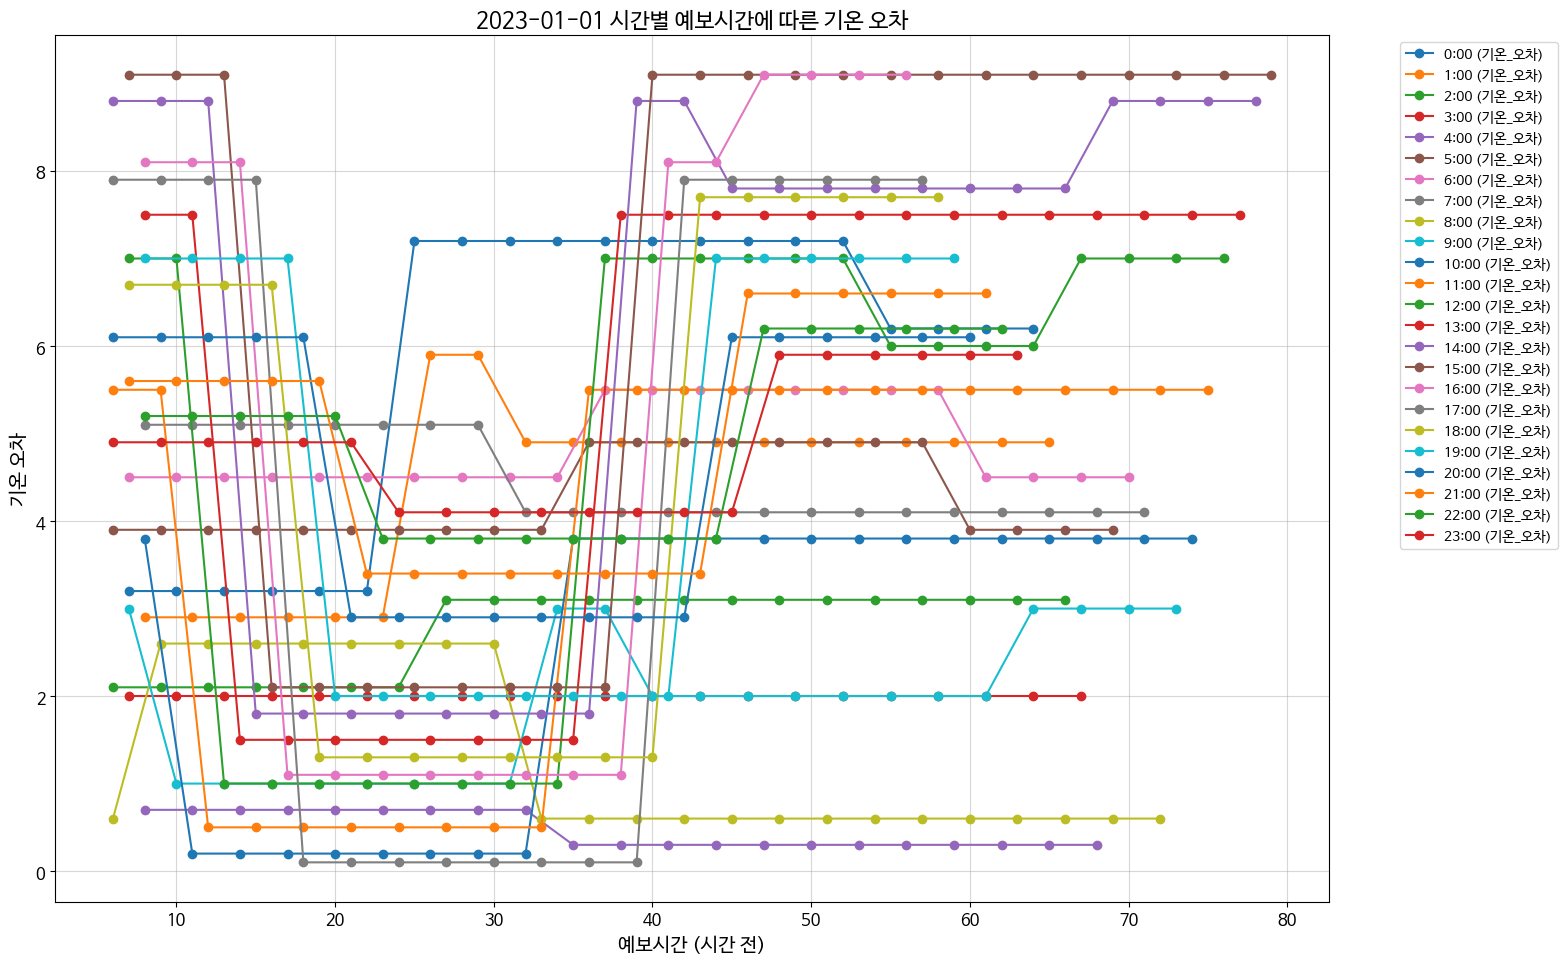

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# 관측일시를 datetime으로 변환
merged_df["관측일시"] = pd.to_datetime(merged_df["관측일시"], errors="coerce")

# 데이터 필터링
filtered_df = merged_df[merged_df["관측일시"].dt.date == pd.to_datetime("2023-01-01").date()].copy()

# 오차율 계산
error_cols = ["기온_오차", "강수량_오차", "풍속_오차", "풍향_오차", "습도_오차", "적설_오차"]
for col in error_cols:
    error_rate_col = f"{col}_오차율"
    filtered_df.loc[:, error_rate_col] = (
        (filtered_df[col].abs() / filtered_df[col.replace("_오차", "_실제")].replace(0, 1)) * 100
    )

plot_metric("기온_오차", "기온 오차", "기온 오차", "2023-01-01")

### 강수량

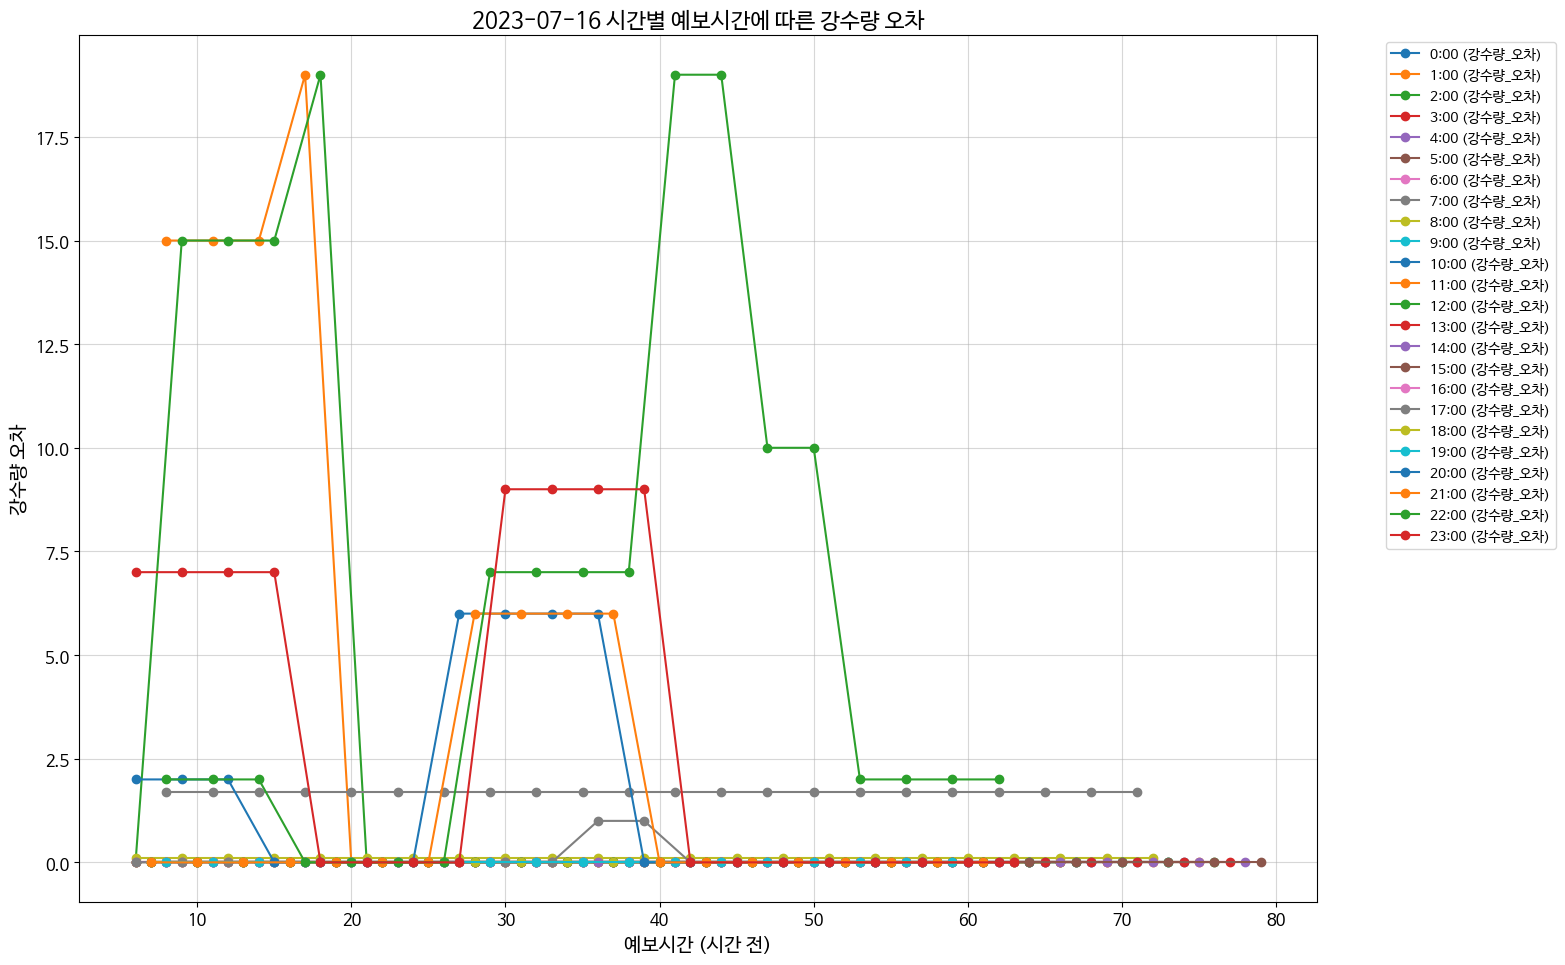

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# 관측일시를 datetime으로 변환
merged_df["관측일시"] = pd.to_datetime(merged_df["관측일시"], errors="coerce")

# 데이터 필터링
filtered_df = merged_df[merged_df["관측일시"].dt.date == pd.to_datetime("2023-07-16").date()].copy()

# 오차율 계산
error_cols = ["기온_오차", "강수량_오차", "풍속_오차", "풍향_오차", "습도_오차", "적설_오차"]
for col in error_cols:
    error_rate_col = f"{col}_오차율"
    filtered_df.loc[:, error_rate_col] = (
        (filtered_df[col].abs() / filtered_df[col.replace("_오차", "_실제")].replace(0, 1)) * 100
    )

plot_metric("강수량_오차", "강수량 오차", "강수량 오차", "2023-07-16")

### 적설

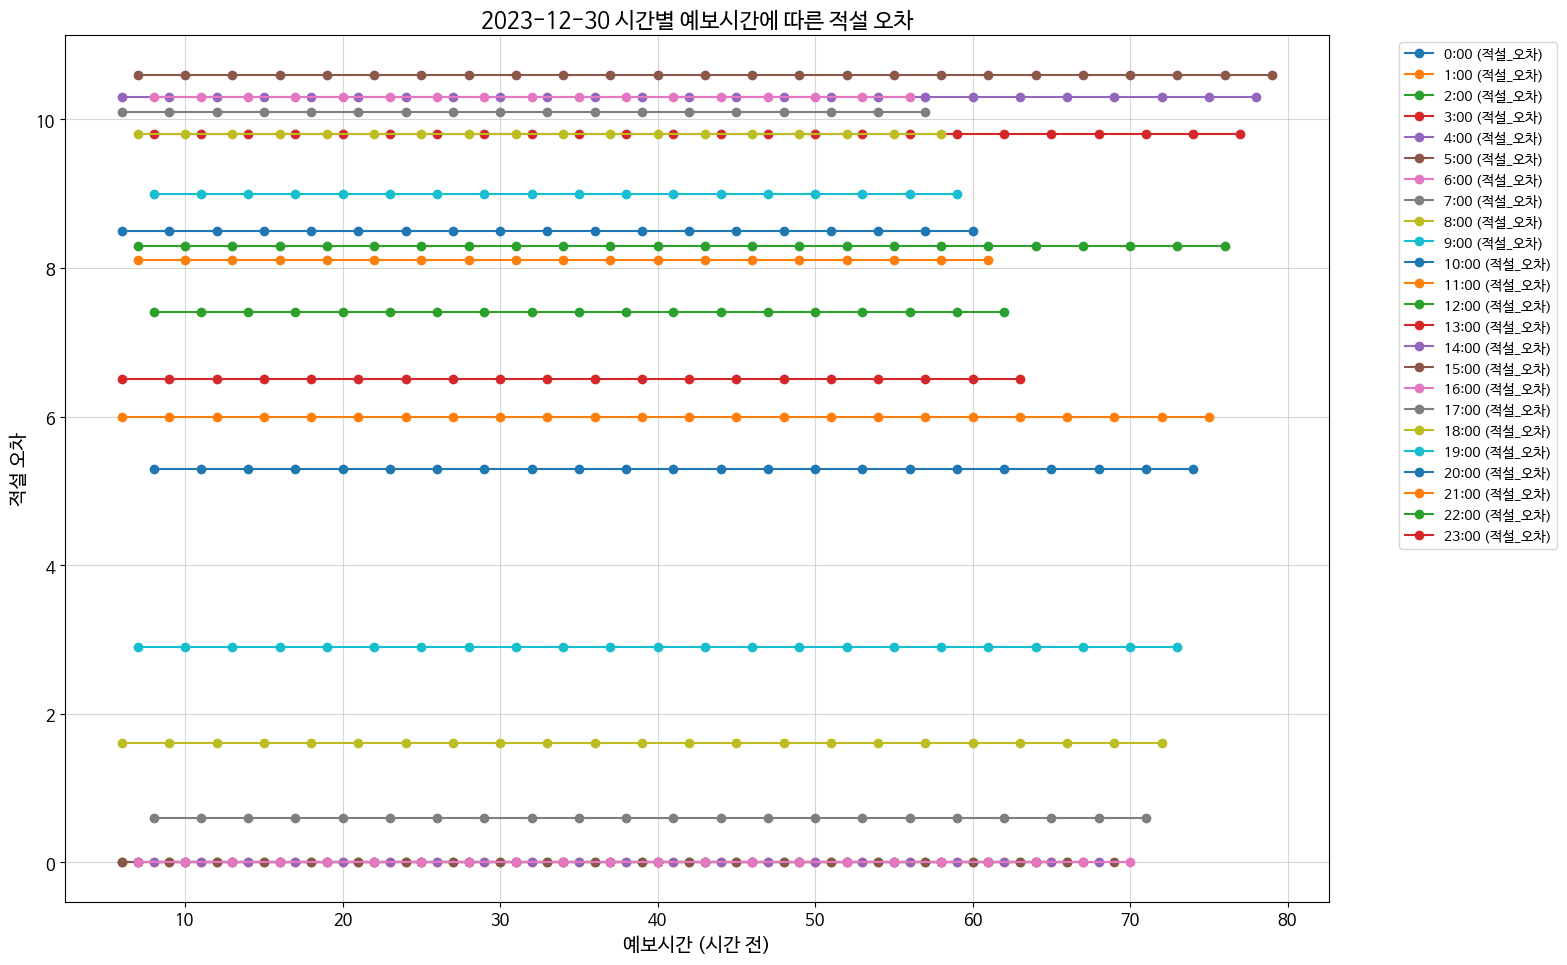

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# 관측일시를 datetime으로 변환
merged_df["관측일시"] = pd.to_datetime(merged_df["관측일시"], errors="coerce")

# 데이터 필터링
filtered_df = merged_df[merged_df["관측일시"].dt.date == pd.to_datetime("2023-12-30").date()].copy()

# 오차율 계산
error_cols = ["기온_오차", "강수량_오차", "풍속_오차", "풍향_오차", "습도_오차", "적설_오차"]
for col in error_cols:
    error_rate_col = f"{col}_오차율"
    filtered_df.loc[:, error_rate_col] = (
        (filtered_df[col].abs() / filtered_df[col.replace("_오차", "_실제")].replace(0, 1)) * 100
    )

plot_metric("적설_오차", "적설 오차", "적설 오차", "2023-12-30")

### 풍속

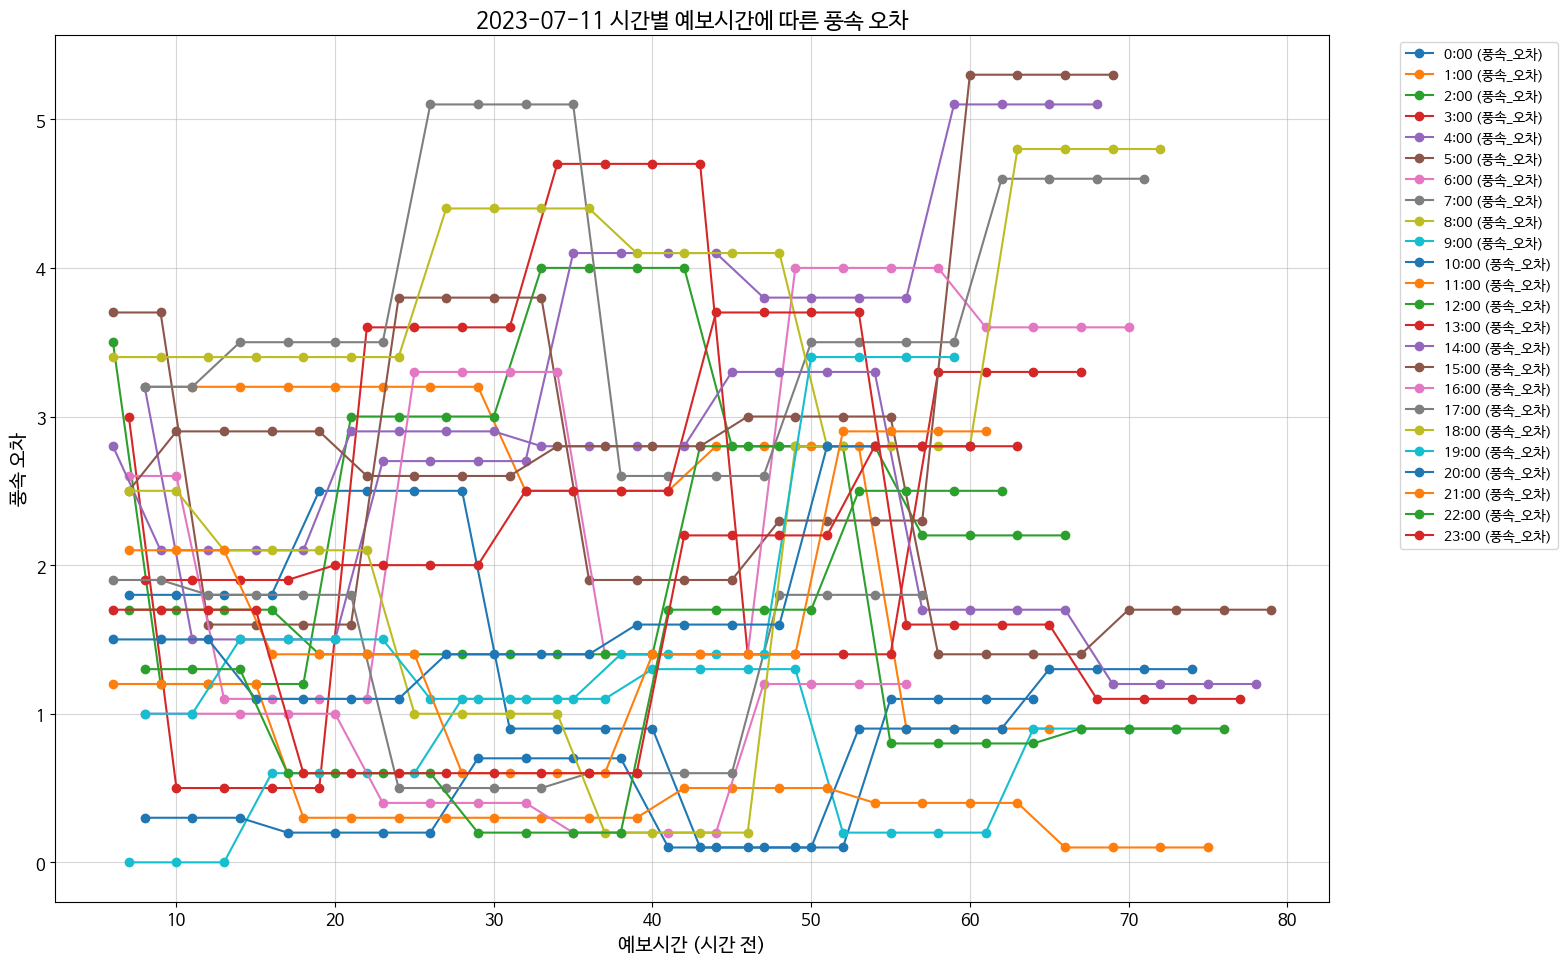

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# 관측일시를 datetime으로 변환
merged_df["관측일시"] = pd.to_datetime(merged_df["관측일시"], errors="coerce")

# 데이터 필터링
filtered_df = merged_df[merged_df["관측일시"].dt.date == pd.to_datetime("2023-07-11").date()].copy()

# 오차율 계산
error_cols = ["기온_오차", "강수량_오차", "풍속_오차", "풍향_오차", "습도_오차", "적설_오차"]
for col in error_cols:
    error_rate_col = f"{col}_오차율"
    filtered_df.loc[:, error_rate_col] = (
        (filtered_df[col].abs() / filtered_df[col.replace("_오차", "_실제")].replace(0, 1)) * 100
    )

plot_metric("풍속_오차", "풍속 오차", "풍속 오차", "2023-07-11")

## 날씨 상태 별

### 날씨 상태 컬럼 추가

In [21]:
def classify_weather(row):
    if row['강수량_실제'] > 0:
        return '비'
    elif row['적설_실제'] > 0:
        return '눈'
    else:
        return '맑음'

merged_df['날씨상태'] = merged_df.apply(classify_weather, axis=1)

### 기온 상관관계

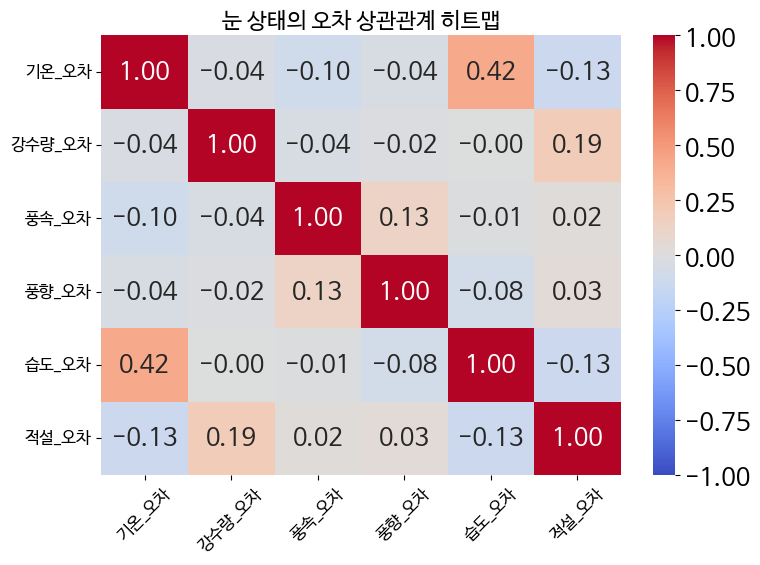

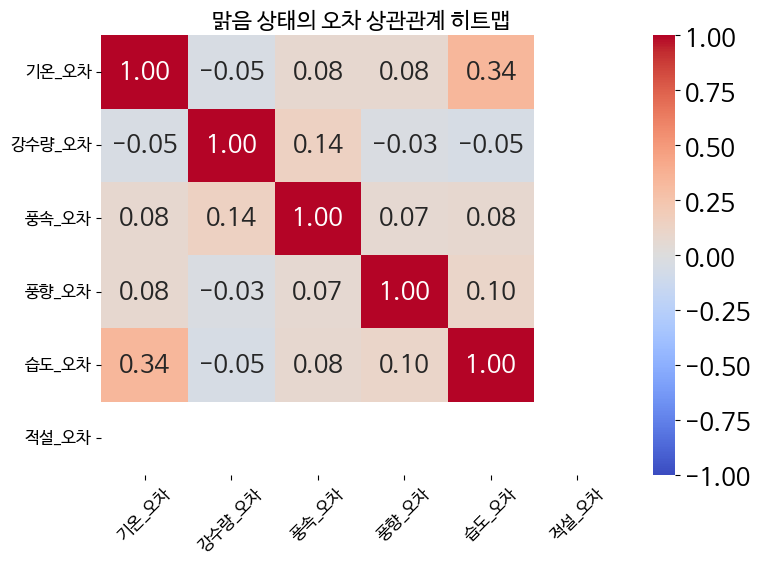

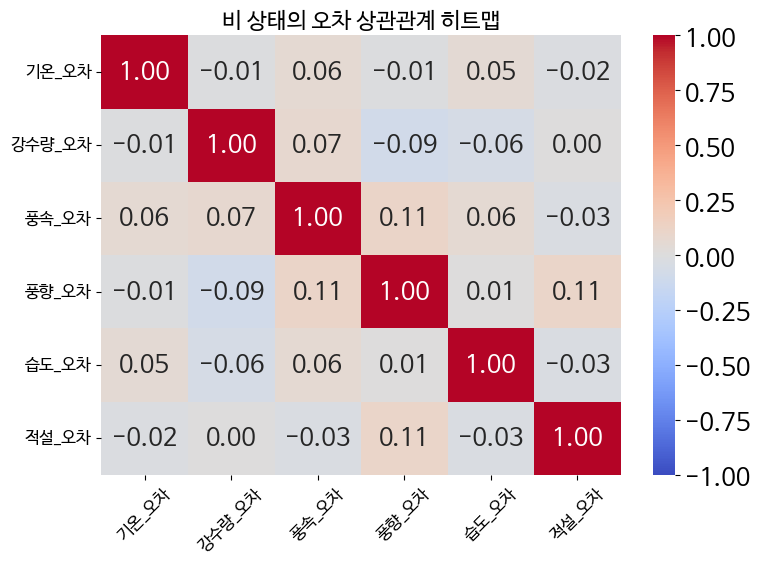

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 분석할 오차 값 컬럼 정의
error_cols = ["기온_오차", "강수량_오차", "풍속_오차", "풍향_오차", "습도_오차", "적설_오차"]

# 날씨 상태별 그룹화
weather_groups = merged_df.groupby("날씨상태")

# 날씨 상태별 상관관계 히트맵 그리기
for weather, group in weather_groups:
    # 오차 컬럼들로만 구성된 데이터프레임에서 상관관계 계산
    correlation = group[error_cols].corr()

    # 히트맵 그리기
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, cbar=True)
    plt.title(f"{weather} 상태의 오차 상관관계 히트맵", fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12, rotation=0)
    plt.tight_layout()
    plt.show()

날씨별 오차

<Figure size 1200x800 with 0 Axes>

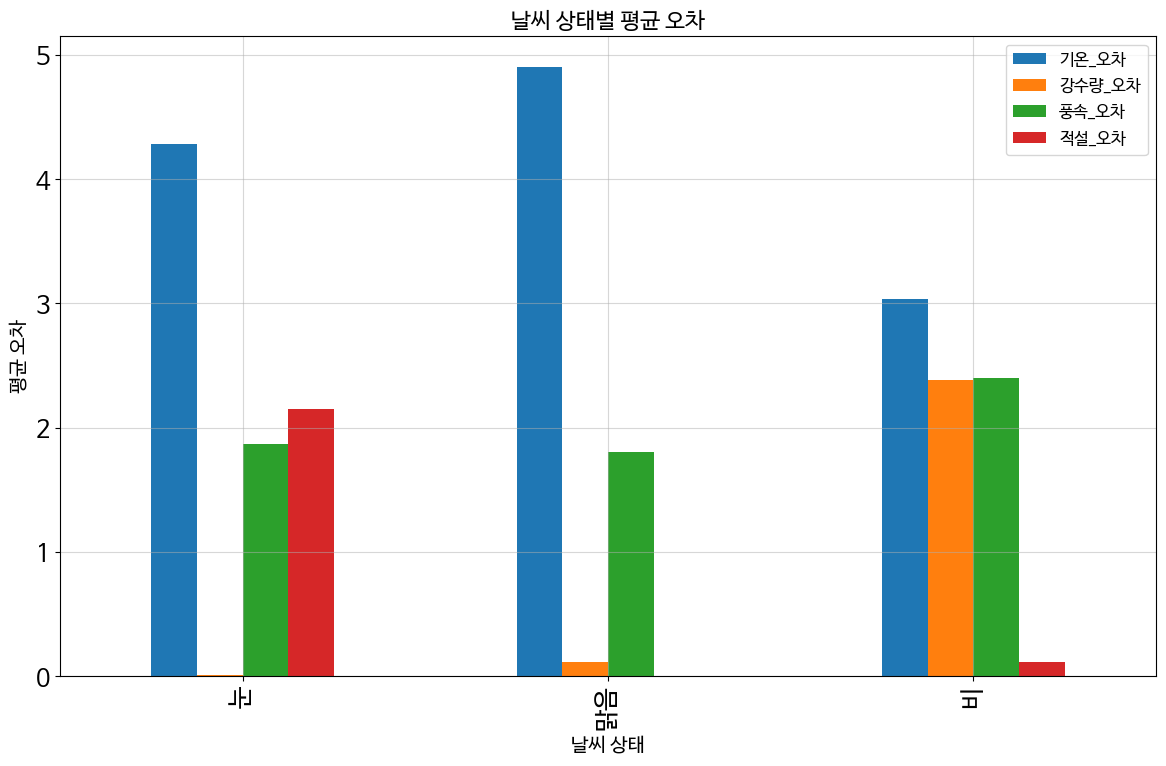

In [27]:
import matplotlib.pyplot as plt

# 날씨 상태별 평균 오차 계산
error_cols = ["기온_오차", "강수량_오차", "풍속_오차", "적설_오차"]
weather_mean_errors = merged_df.groupby("날씨상태")[error_cols].mean()

# 시각화
plt.figure(figsize=(12, 8))
weather_mean_errors.plot(kind="bar", figsize=(12, 8))
plt.title("날씨 상태별 평균 오차", fontsize=16)
plt.ylabel("평균 오차", fontsize=14)
plt.xlabel("날씨 상태", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
